# Introducción


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression


import statsmodels.api as sm

sns.set(style='darkgrid')
encoder = preprocessing.LabelEncoder()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [98]:
df = pd.read_excel("default of credit card clients.xls", index_col=0, header=1)
df.sample(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
21757,270000,2,2,1,25,0,0,0,0,0,0,184560,178592,170225,156719,151716,153519,6061,6081,5072,5009,5254,4069,0
12717,200000,1,3,2,29,0,0,-1,-1,-1,-1,41151,21132,482,482,462,446,1650,482,482,462,466,0,0
27626,50000,2,2,2,24,-1,-1,-2,-1,-1,0,594,0,0,51400,11330,12144,0,0,51400,11330,1000,1000,0
20402,50000,1,2,2,23,0,0,0,0,-2,-2,48784,50371,51400,0,0,0,2400,2400,0,0,0,0,0
6282,30000,1,1,2,26,4,3,2,0,0,-2,25899,25177,22768,18600,0,0,0,600,800,0,0,0,1


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [100]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [101]:
print(df.isnull().values.any())     #Check for NaN in all the dataframe
df.isnull().sum().sum()         #Check how many NaN


False


0

In [102]:
df = df.rename(columns={'default payment next month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [103]:
# Variables Categoricas
df[["SEX", "EDUCATION", "MARRIAGE"]].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


No hay datos faltantes, pero se encuentran errores en las etiquetas

EDUCATION: tiene las categorías 5 y 6 sin etiqueta, categoría 0 no tiene documentación  
MARRIAGE: tiene la categoría 0 indocumentada

In [104]:
# Payment delay descripción
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


Todas presentan una etiqueta -2 que no está documentada. Si 1, 2, 3, etc.son los meses de retraso, 0 debe etiquetarse como 'pagar debidamente' y cada valor negativo debe verse como un 0

In [105]:
# Bill Statement descripción
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Como se deben interpretar los valores negativos cuando se trata de crédito

## Exploración de Datos

### Interpretación de variables categorícas  
SEX, MARRIAGE, EDUACTION

In [106]:
df.SEX.value_counts() # Más mujeres que hombres

2    18112
1    11888
Name: SEX, dtype: int64

In [107]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [108]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [109]:
df.def_pay.value_counts()

0    23364
1     6636
Name: def_pay, dtype: int64

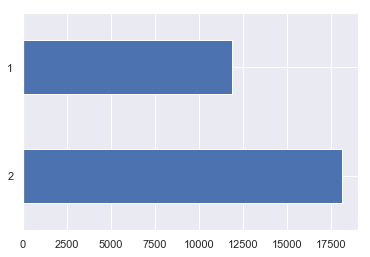

In [110]:
df.SEX.value_counts().plot(kind = "barh")

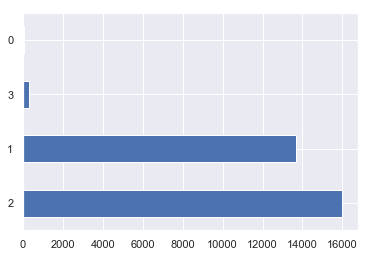

In [111]:
df.MARRIAGE.value_counts().plot(kind = "barh")

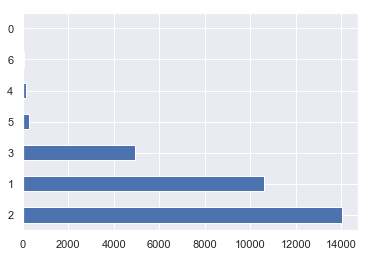

In [112]:
df.EDUCATION.value_counts().plot(kind = "barh")

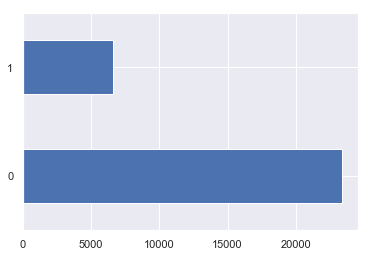

In [113]:
df.def_pay.value_counts().plot(kind = "barh")


In [114]:
print(100*df.def_pay.value_counts(normalize=True))

0    77.88
1    22.12
Name: def_pay, dtype: float64


### Interpretación de variables numéricas  

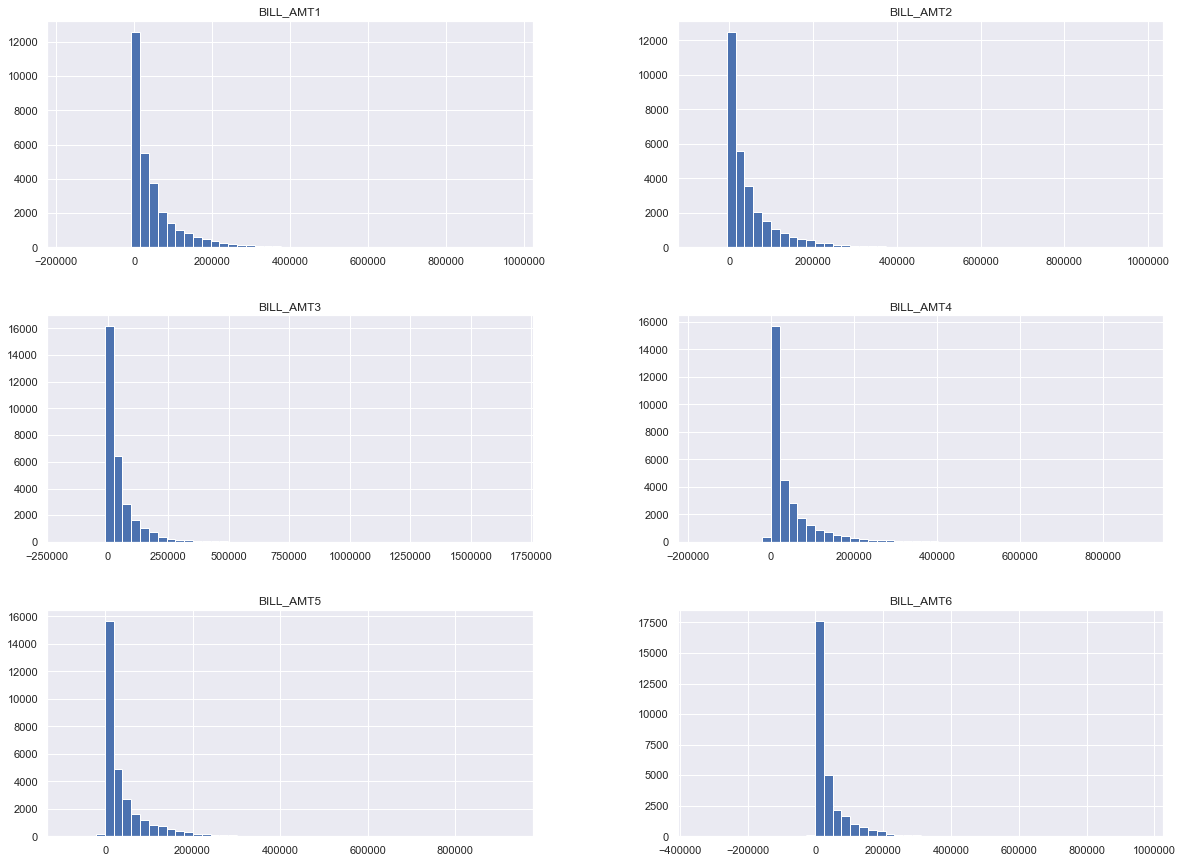

In [115]:
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
bills.hist(bins=50, figsize=(20,15)) 
plt.show()

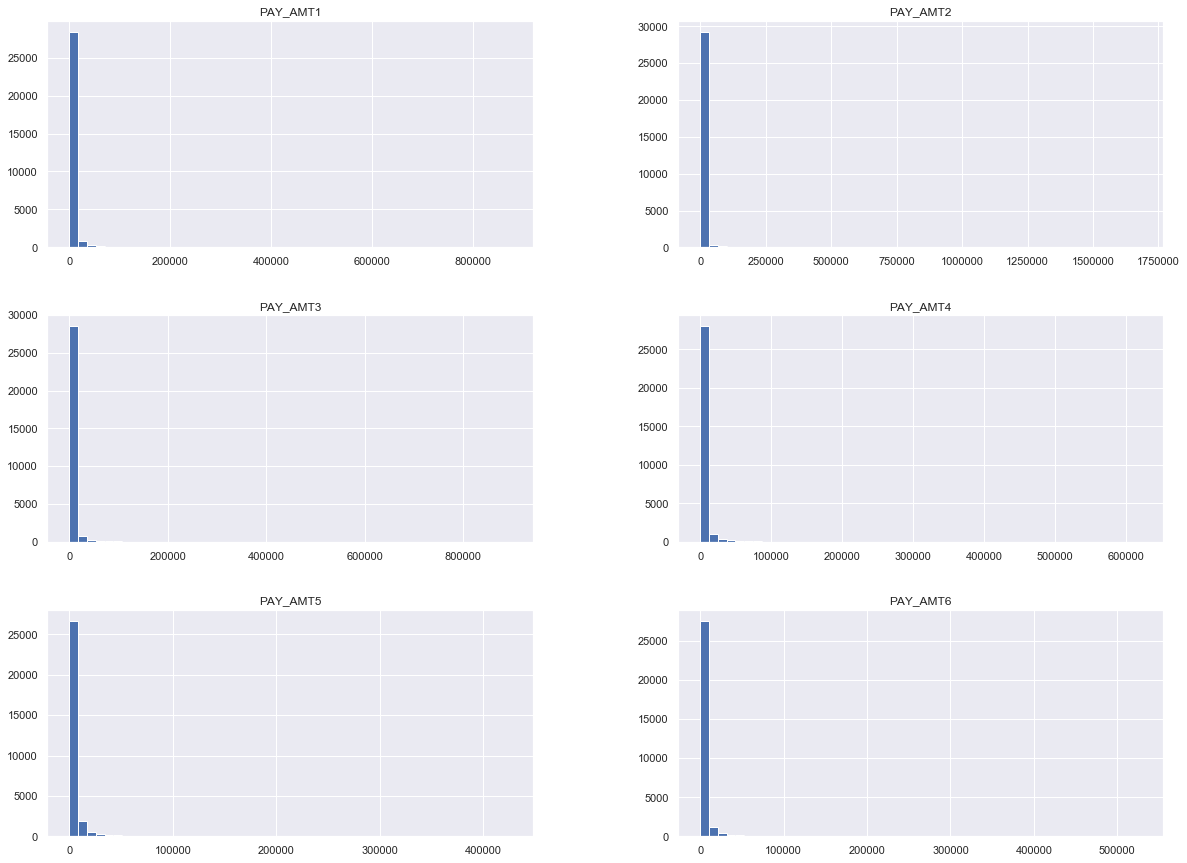

In [116]:
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
pay.hist(bins=50, figsize=(20,15)) 
plt.show()

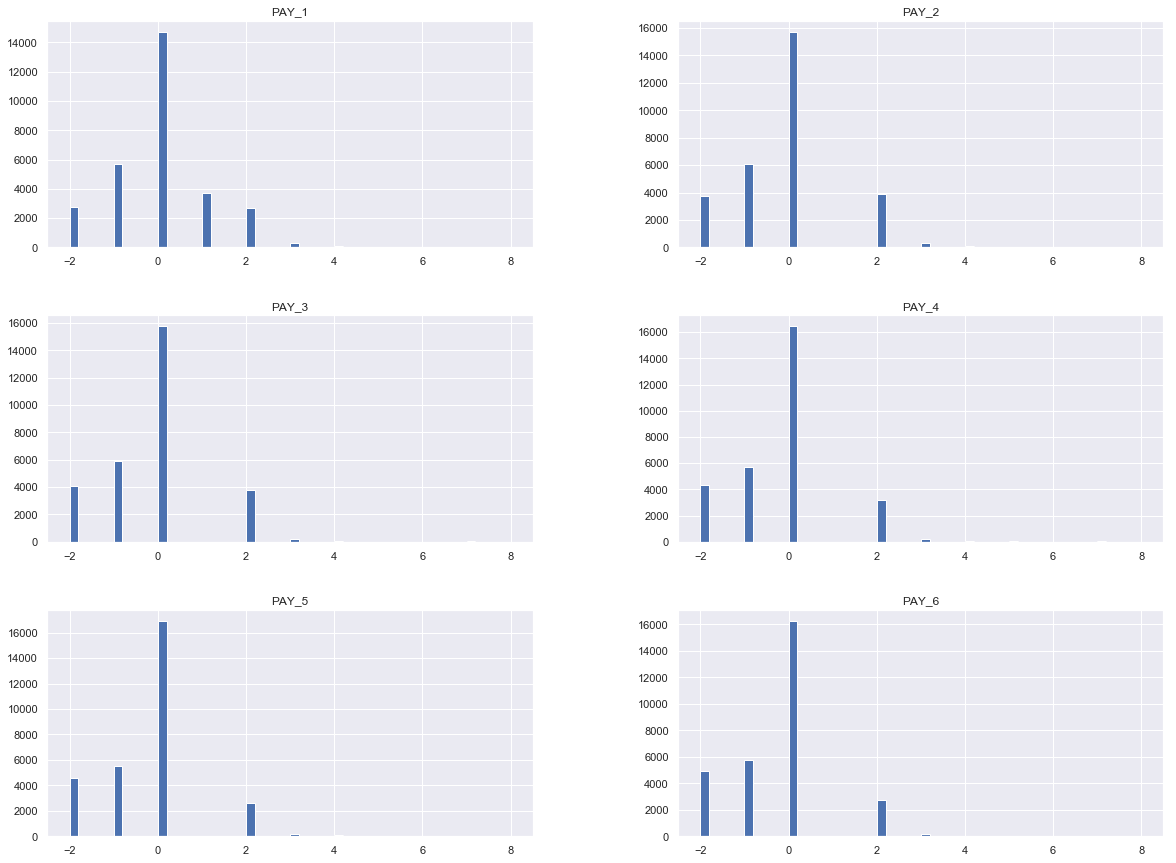

In [117]:
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
late.hist(bins=50, figsize=(20,15)) 
plt.show()

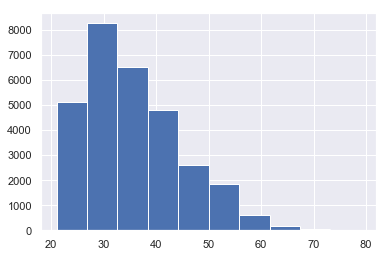

In [118]:
df.AGE.hist()

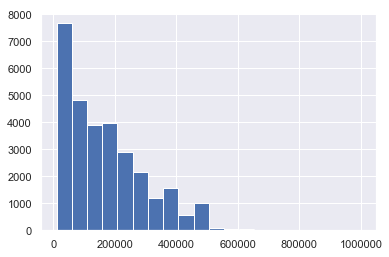

In [119]:
df.LIMIT_BAL.hist(bins = 20)

Se observa que las cantidades referidas a alguna cantidad de dinero tienen un rango muy amplio, lo que puede ocasionar problemas a algunos modelos (por ejemplo en modelos de regresión lineal)

### Correlación de Pearson

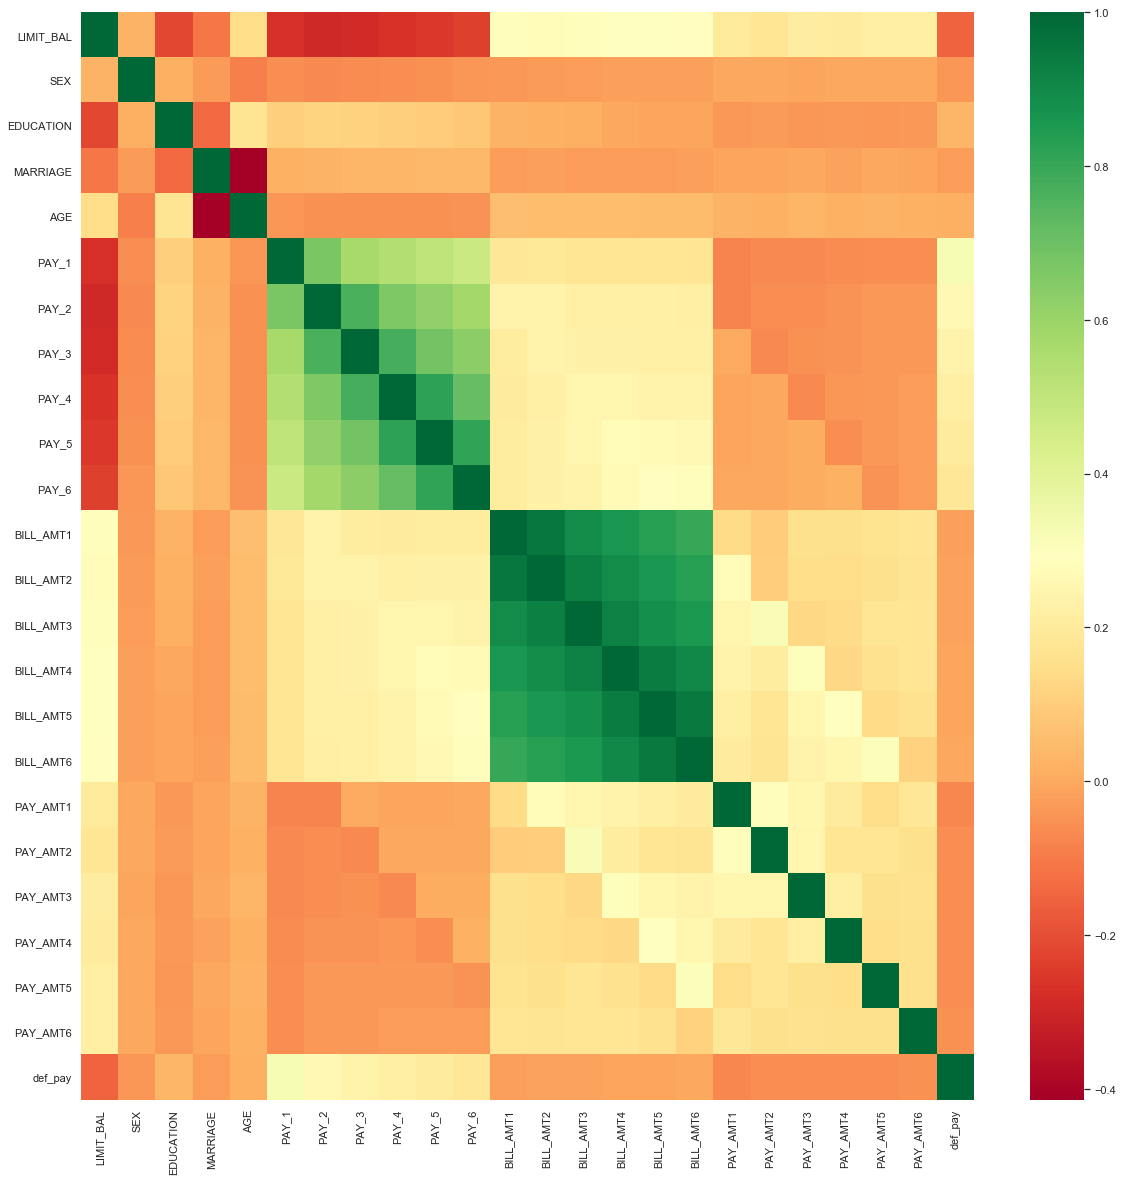

In [120]:
df_num = df.drop(["EDUCATION", "MARRIAGE", "AGE"], axis = 1).copy()
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap ="RdYlGn")
plt.show()

### Reparación de datos pre limpieza

El 0 en MATRIMONIO se puede categorizar con seguridad como 'Otro' (por lo tanto, 3).  
El 0 (indocumentado), 5 y 6 (etiqueta desconocida) en EDUCACIÓN también se pueden poner en otra 'categoría (por lo tanto, 4)

In [121]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [122]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

Según nuestra documentación, las variables PAY_n indican el número de meses de atraso e indica "pagar debidamente" con -1.  
Entonces, ¿qué es -2? ¿Y qué es 0? Me parece que la etiqueta debe ajustarse a 0 para pagar debidamente.

In [123]:
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

### Separacion de dataset en train y test

In [124]:
df_train, df_test = train_test_split(df, train_size=0.80, random_state=42).copy()

In [125]:
X_train = df_train.drop(["def_pay"], axis = 1).copy()
y_train = df_train["def_pay"].copy()
X_test = df_test.drop(["def_pay"], axis = 1).copy()
y_test = df_test["def_pay"].copy()

In [126]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,,,
21754,80000,2,2,2,24,0,0,0,0,0,0,75125,77353,78321,73731,39643,39457,3503,5001,2092,1218,1445,878
252,30000,1,2,2,28,0,0,0,0,0,0,29242,29507,29155,25255,22001,0,5006,1244,851,955,0,0
22942,180000,2,4,1,44,0,0,0,0,0,0,20916,0,850,0,6881,10340,0,850,0,6881,10340,182
619,60000,1,1,2,25,0,0,0,0,0,0,58839,53235,38533,39639,39619,39140,2018,1900,2000,1500,1900,2000
17091,130000,2,2,2,25,0,0,0,0,0,0,111587,112348,114734,117823,120854,123904,4100,4200,5000,5000,5000,10700


Escalamiento de datos

In [127]:
means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)
X_train_sc = (X_train - means)/stds
X_test_sc = (X_test - means)/stds

In [128]:
X_train_sc.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,,,
21754,-0.672359,0.808159,0.210900,0.848301,-1.244658,-0.4682,-0.399773,-0.384148,-0.340674,-0.309049,-0.318521,0.329670,0.400979,0.455707,0.479450,-0.008367,0.011698,-0.126892,-0.039537,-0.173567,-0.224654,-0.216008,-0.245240
252,-1.057768,-1.237381,0.210900,0.848301,-0.811521,-0.4682,-0.399773,-0.384148,-0.340674,-0.309049,-0.318521,-0.295445,-0.273649,-0.254132,-0.277182,-0.299323,-0.653898,-0.038915,-0.194250,-0.241596,-0.240785,-0.308523,-0.295532
22942,0.098459,0.808159,2.893256,-1.066779,0.921024,-0.4682,-0.399773,-0.384148,-0.340674,-0.309049,-0.318521,-0.408879,-0.689698,-0.662788,-0.671371,-0.548685,-0.479473,-0.331937,-0.210475,-0.288246,0.122676,0.353487,-0.285107
619,-0.826523,-1.237381,-1.130278,0.848301,-1.136374,-0.4682,-0.399773,-0.384148,-0.340674,-0.309049,-0.318521,0.107788,0.060915,-0.118736,-0.052671,-0.008763,0.006350,-0.213815,-0.167236,-0.178610,-0.207358,-0.186877,-0.180973
17091,-0.286950,0.808159,0.210900,0.848301,-1.136374,-0.4682,-0.399773,-0.384148,-0.340674,-0.309049,-0.318521,0.826432,0.894408,0.981423,1.167654,1.330983,1.436224,-0.091947,-0.072522,-0.014157,0.007308,0.011598,0.317359


Normalizacion de entrenamiento


In [129]:
def std_based(col_name,df):
    mean = df[col_name].mean()
    std = df[col_name].std()
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    new_df = df[(df[col_name] < upper) & (df[col_name] > lower)]
    return new_df

### Analisis de valores faltantes y Outliers

Variable LIMIT_BAL

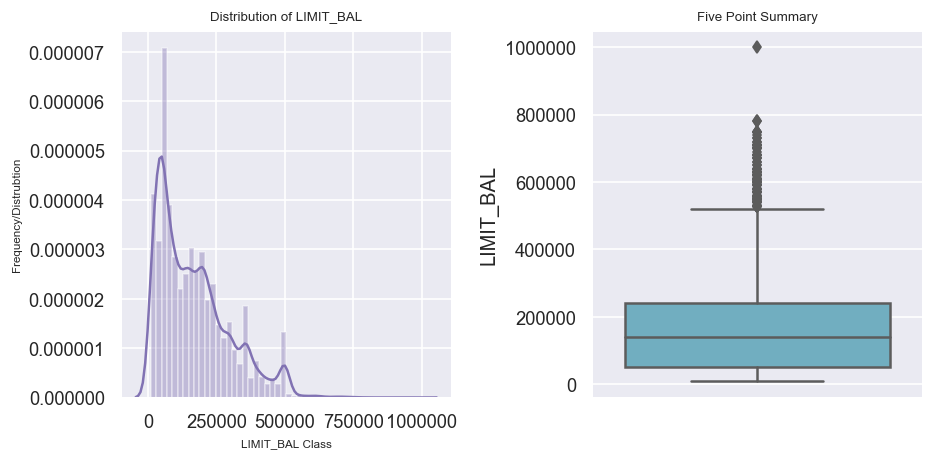

In [130]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['LIMIT_BAL'],ax=axes[0],color='m')
axes[0].set_title('Distribution of LIMIT_BAL',fontdict={'fontsize':8})
axes[0].set_xlabel('LIMIT_BAL Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('LIMIT_BAL',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [131]:
df_train.loc[df.LIMIT_BAL == 0, "LIMIT_BAL"] = df_train.LIMIT_BAL.mean()
df_train.head()

C:\Users\elurz\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,,,,
21754,80000.0,2,2,2,24,0,0,0,0,0,0,75125,77353,78321,73731,39643,39457,3503,5001,2092,1218,1445,878,0
252,30000.0,1,2,2,28,0,0,0,0,0,0,29242,29507,29155,25255,22001,0,5006,1244,851,955,0,0,0
22942,180000.0,2,4,1,44,0,0,0,0,0,0,20916,0,850,0,6881,10340,0,850,0,6881,10340,182,0
619,60000.0,1,1,2,25,0,0,0,0,0,0,58839,53235,38533,39639,39619,39140,2018,1900,2000,1500,1900,2000,0
17091,130000.0,2,2,2,25,0,0,0,0,0,0,111587,112348,114734,117823,120854,123904,4100,4200,5000,5000,5000,10700,0


In [132]:
df_train  = std_based('LIMIT_BAL',df_train)

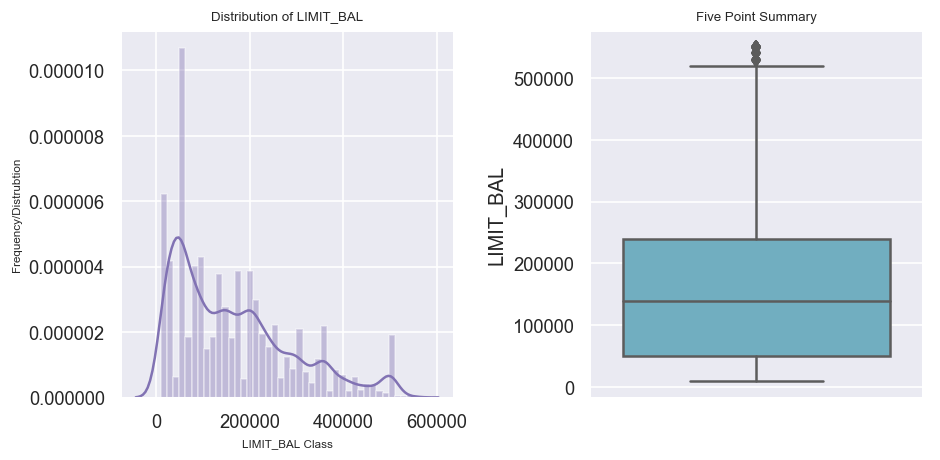

In [133]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['LIMIT_BAL'],ax=axes[0],color='m')
axes[0].set_title('Distribution of LIMIT_BAL',fontdict={'fontsize':8})
axes[0].set_xlabel('LIMIT_BAL Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('LIMIT_BAL',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Variable AGE

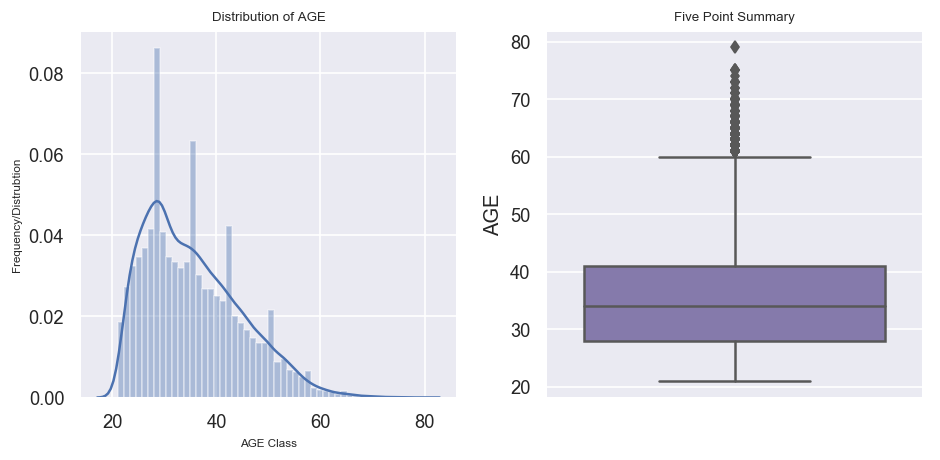

In [134]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['AGE'],ax=axes[0],color='b')
axes[0].set_title('Distribution of AGE',fontdict={'fontsize':8})
axes[0].set_xlabel('AGE Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('AGE',data=df_train,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [135]:
df_train  = std_based('AGE',df_train)

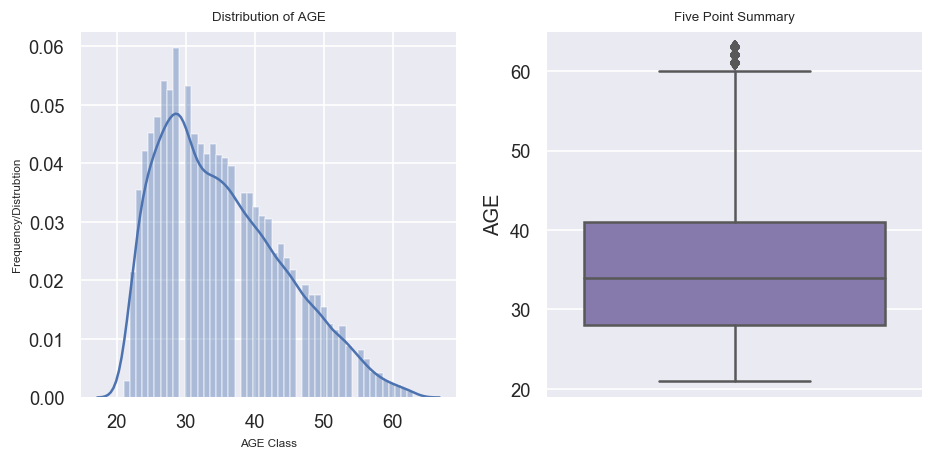

In [136]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['AGE'],ax=axes[0],color='b')
axes[0].set_title('Distribution of AGE',fontdict={'fontsize':8})
axes[0].set_xlabel('AGE Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('AGE',data=df_train,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Variable BILL_AMT1

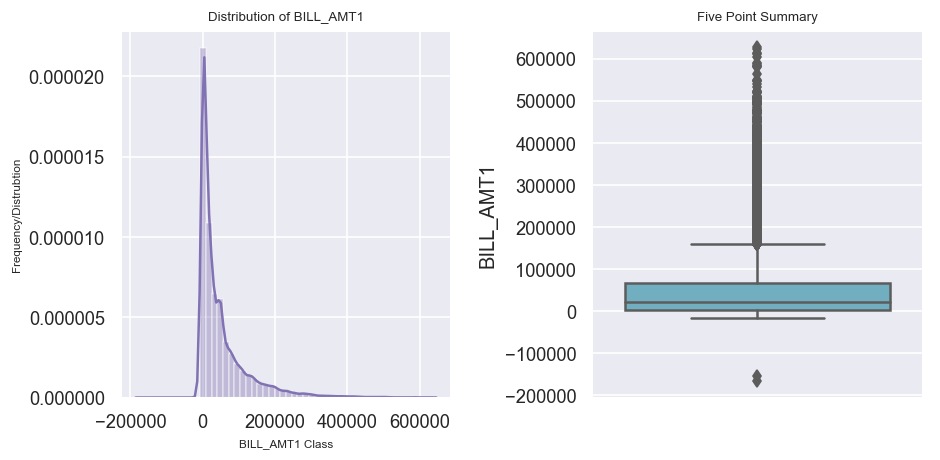

In [137]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['BILL_AMT1'],ax=axes[0],color='m')
axes[0].set_title('Distribution of BILL_AMT1',fontdict={'fontsize':8})
axes[0].set_xlabel('BILL_AMT1 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BILL_AMT1',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [138]:
df_train.loc[df.BILL_AMT1 <= 0, "BILL_AMT1"] = df_train.BILL_AMT1.mean()
df_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,,,,
21754,80000.0,2,2,2,24,0,0,0,0,0,0,75125.0,77353,78321,73731,39643,39457,3503,5001,2092,1218,1445,878,0
252,30000.0,1,2,2,28,0,0,0,0,0,0,29242.0,29507,29155,25255,22001,0,5006,1244,851,955,0,0,0
22942,180000.0,2,4,1,44,0,0,0,0,0,0,20916.0,0,850,0,6881,10340,0,850,0,6881,10340,182,0
619,60000.0,1,1,2,25,0,0,0,0,0,0,58839.0,53235,38533,39639,39619,39140,2018,1900,2000,1500,1900,2000,0
17091,130000.0,2,2,2,25,0,0,0,0,0,0,111587.0,112348,114734,117823,120854,123904,4100,4200,5000,5000,5000,10700,0


In [139]:
df_train  = std_based('BILL_AMT1',df_train)

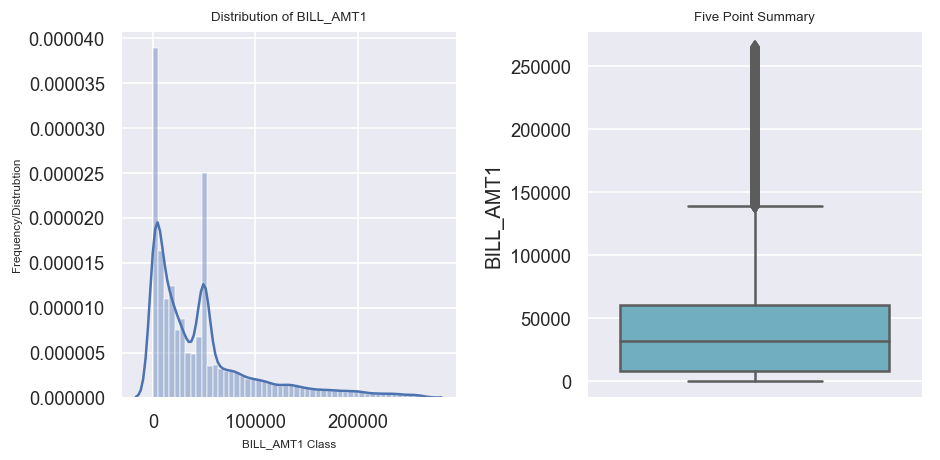

In [140]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['BILL_AMT1'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BILL_AMT1',fontdict={'fontsize':8})
axes[0].set_xlabel('BILL_AMT1 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BILL_AMT1',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Variable BILL_AMT2

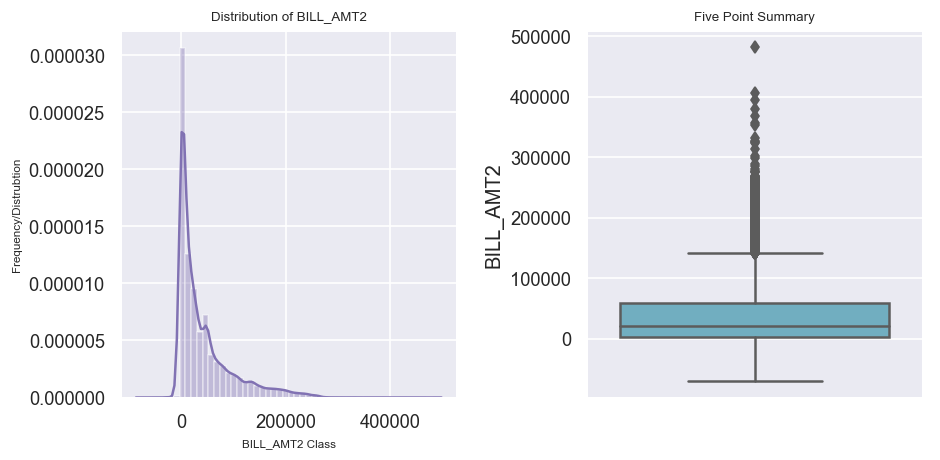

In [141]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['BILL_AMT2'],ax=axes[0],color='m')
axes[0].set_title('Distribution of BILL_AMT2',fontdict={'fontsize':8})
axes[0].set_xlabel('BILL_AMT2 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BILL_AMT2',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [142]:
df_train.loc[df.BILL_AMT2 <= 0, "BILL_AMT2"] = df_train.BILL_AMT2.mean()
df_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,,,,
21754,80000.0,2,2,2,24,0,0,0,0,0,0,75125.0,77353.000000,78321,73731,39643,39457,3503,5001,2092,1218,1445,878,0
252,30000.0,1,2,2,28,0,0,0,0,0,0,29242.0,29507.000000,29155,25255,22001,0,5006,1244,851,955,0,0,0
22942,180000.0,2,4,1,44,0,0,0,0,0,0,20916.0,41868.057679,850,0,6881,10340,0,850,0,6881,10340,182,0
619,60000.0,1,1,2,25,0,0,0,0,0,0,58839.0,53235.000000,38533,39639,39619,39140,2018,1900,2000,1500,1900,2000,0
17091,130000.0,2,2,2,25,0,0,0,0,0,0,111587.0,112348.000000,114734,117823,120854,123904,4100,4200,5000,5000,5000,10700,0


In [143]:
df_train  = std_based('BILL_AMT2',df_train)

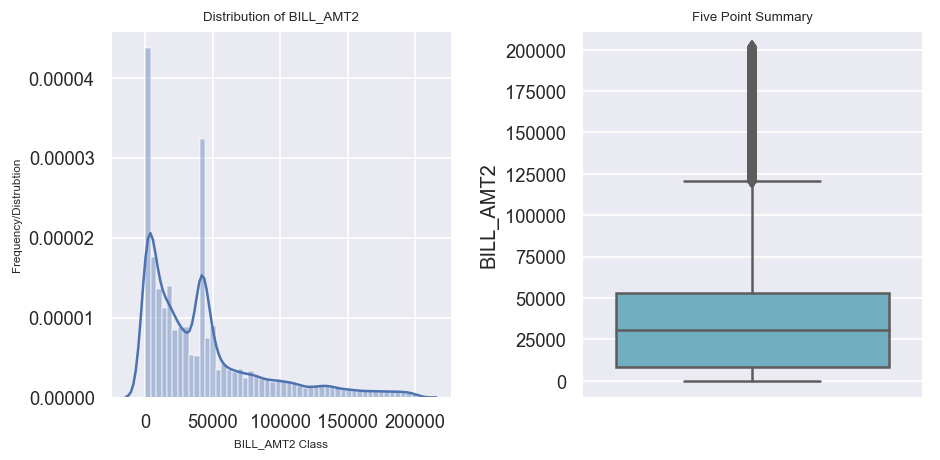

In [144]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['BILL_AMT2'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BILL_AMT2',fontdict={'fontsize':8})
axes[0].set_xlabel('BILL_AMT2 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BILL_AMT2',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Variable BILL_AMT3

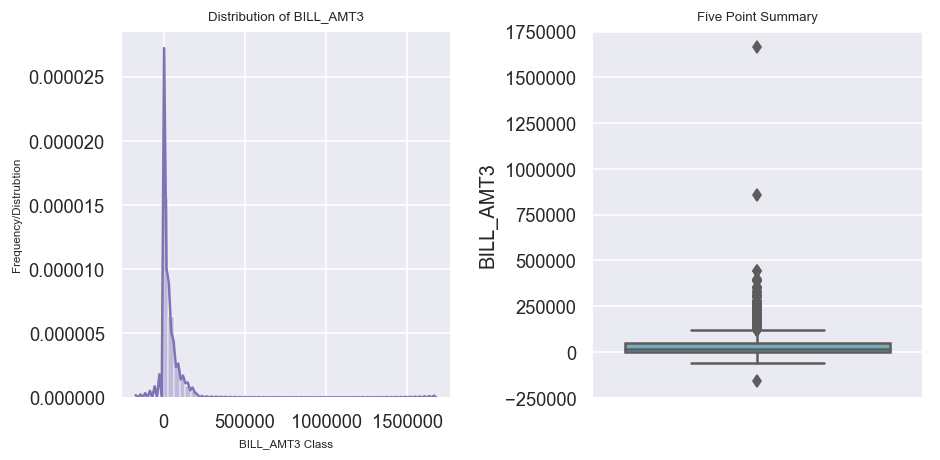

In [145]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['BILL_AMT3'],ax=axes[0],color='m')
axes[0].set_title('Distribution of BILL_AMT3',fontdict={'fontsize':8})
axes[0].set_xlabel('BILL_AMT3 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BILL_AMT3',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [146]:
df_train.loc[df.BILL_AMT3 <= 0, "BILL_AMT3"] = df_train.BILL_AMT3.mean()
df_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,,,,
21754,80000.0,2,2,2,24,0,0,0,0,0,0,75125.0,77353.000000,78321.0,73731,39643,39457,3503,5001,2092,1218,1445,878,0
252,30000.0,1,2,2,28,0,0,0,0,0,0,29242.0,29507.000000,29155.0,25255,22001,0,5006,1244,851,955,0,0,0
22942,180000.0,2,4,1,44,0,0,0,0,0,0,20916.0,41868.057679,850.0,0,6881,10340,0,850,0,6881,10340,182,0
619,60000.0,1,1,2,25,0,0,0,0,0,0,58839.0,53235.000000,38533.0,39639,39619,39140,2018,1900,2000,1500,1900,2000,0
17091,130000.0,2,2,2,25,0,0,0,0,0,0,111587.0,112348.000000,114734.0,117823,120854,123904,4100,4200,5000,5000,5000,10700,0


In [147]:
df_train  = std_based('BILL_AMT3',df_train)

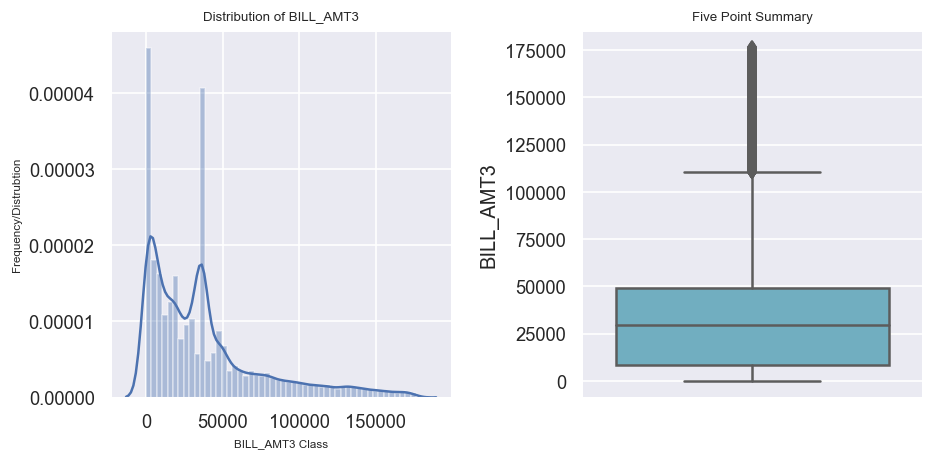

In [148]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['BILL_AMT3'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BILL_AMT3',fontdict={'fontsize':8})
axes[0].set_xlabel('BILL_AMT3 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BILL_AMT3',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Variable BILL_AMT4

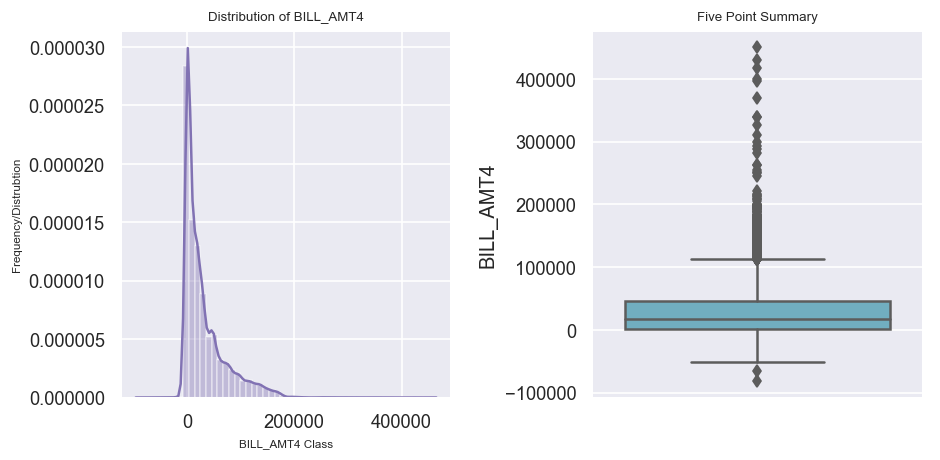

In [149]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['BILL_AMT4'],ax=axes[0],color='m')
axes[0].set_title('Distribution of BILL_AMT4',fontdict={'fontsize':8})
axes[0].set_xlabel('BILL_AMT4 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BILL_AMT4',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [150]:
df_train.loc[df.BILL_AMT4 <= 0, "BILL_AMT4"] = df_train.BILL_AMT4.mean()
df_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,,,,
21754,80000.0,2,2,2,24,0,0,0,0,0,0,75125.0,77353.000000,78321.0,73731.000000,39643,39457,3503,5001,2092,1218,1445,878,0
252,30000.0,1,2,2,28,0,0,0,0,0,0,29242.0,29507.000000,29155.0,25255.000000,22001,0,5006,1244,851,955,0,0,0
22942,180000.0,2,4,1,44,0,0,0,0,0,0,20916.0,41868.057679,850.0,31344.375442,6881,10340,0,850,0,6881,10340,182,0
619,60000.0,1,1,2,25,0,0,0,0,0,0,58839.0,53235.000000,38533.0,39639.000000,39619,39140,2018,1900,2000,1500,1900,2000,0
17091,130000.0,2,2,2,25,0,0,0,0,0,0,111587.0,112348.000000,114734.0,117823.000000,120854,123904,4100,4200,5000,5000,5000,10700,0


In [151]:
df_train  = std_based('BILL_AMT4',df_train)

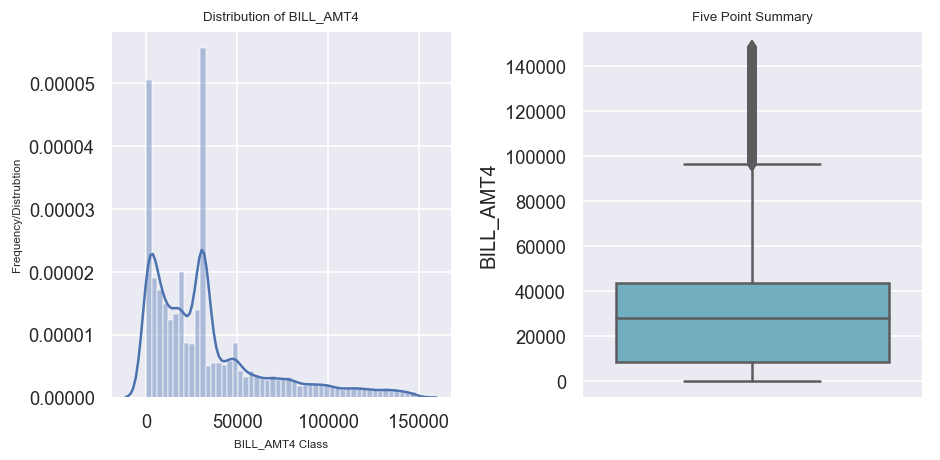

In [153]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['BILL_AMT4'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BILL_AMT4',fontdict={'fontsize':8})
axes[0].set_xlabel('BILL_AMT4 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BILL_AMT4',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Variable BILL_AMT5

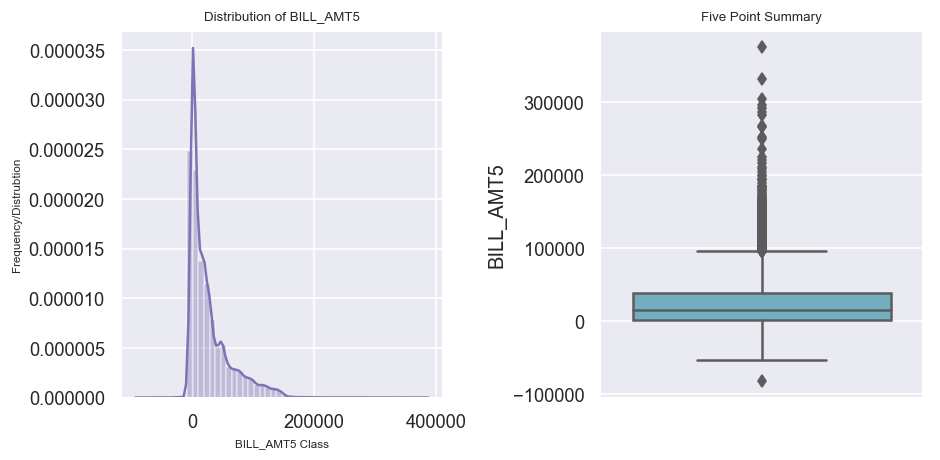

In [154]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['BILL_AMT5'],ax=axes[0],color='m')
axes[0].set_title('Distribution of BILL_AMT5',fontdict={'fontsize':8})
axes[0].set_xlabel('BILL_AMT5 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BILL_AMT5',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [155]:
df_train.loc[df.BILL_AMT5 <= 0, "BILL_AMT5"] = df_train.BILL_AMT5.mean()
df_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,,,,
21754,80000.0,2,2,2,24,0,0,0,0,0,0,75125.0,77353.000000,78321.0,73731.000000,39643.0,39457,3503,5001,2092,1218,1445,878,0
252,30000.0,1,2,2,28,0,0,0,0,0,0,29242.0,29507.000000,29155.0,25255.000000,22001.0,0,5006,1244,851,955,0,0,0
22942,180000.0,2,4,1,44,0,0,0,0,0,0,20916.0,41868.057679,850.0,31344.375442,6881.0,10340,0,850,0,6881,10340,182,0
619,60000.0,1,1,2,25,0,0,0,0,0,0,58839.0,53235.000000,38533.0,39639.000000,39619.0,39140,2018,1900,2000,1500,1900,2000,0
17091,130000.0,2,2,2,25,0,0,0,0,0,0,111587.0,112348.000000,114734.0,117823.000000,120854.0,123904,4100,4200,5000,5000,5000,10700,0


In [156]:
df_train  = std_based('BILL_AMT5',df_train)

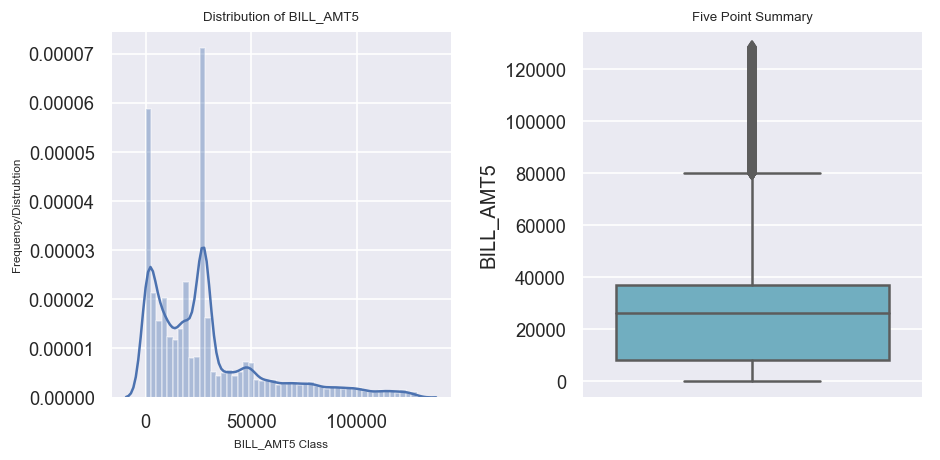

In [157]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['BILL_AMT5'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BILL_AMT5',fontdict={'fontsize':8})
axes[0].set_xlabel('BILL_AMT5 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BILL_AMT5',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Variable BILL_AMT6

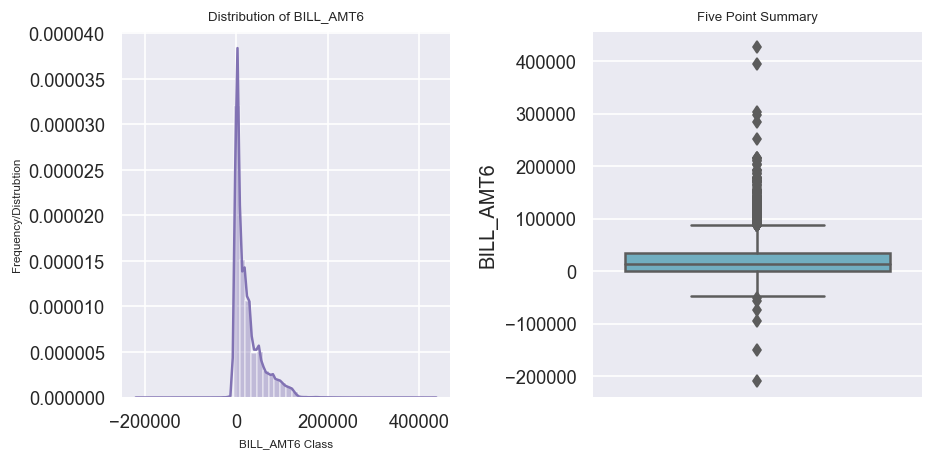

In [158]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['BILL_AMT6'],ax=axes[0],color='m')
axes[0].set_title('Distribution of BILL_AMT6',fontdict={'fontsize':8})
axes[0].set_xlabel('BILL_AMT6 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BILL_AMT6',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [159]:
df_train.loc[df.BILL_AMT6 <= 0, "BILL_AMT6"] = df_train.BILL_AMT6.mean()
df_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,,,,
21754,80000.0,2,2,2,24,0,0,0,0,0,0,75125.0,77353.000000,78321.0,73731.000000,39643.0,39457.000000,3503,5001,2092,1218,1445,878,0
252,30000.0,1,2,2,28,0,0,0,0,0,0,29242.0,29507.000000,29155.0,25255.000000,22001.0,24337.453652,5006,1244,851,955,0,0,0
22942,180000.0,2,4,1,44,0,0,0,0,0,0,20916.0,41868.057679,850.0,31344.375442,6881.0,10340.000000,0,850,0,6881,10340,182,0
619,60000.0,1,1,2,25,0,0,0,0,0,0,58839.0,53235.000000,38533.0,39639.000000,39619.0,39140.000000,2018,1900,2000,1500,1900,2000,0
17091,130000.0,2,2,2,25,0,0,0,0,0,0,111587.0,112348.000000,114734.0,117823.000000,120854.0,123904.000000,4100,4200,5000,5000,5000,10700,0


In [160]:
df_train  = std_based('BILL_AMT6',df_train)

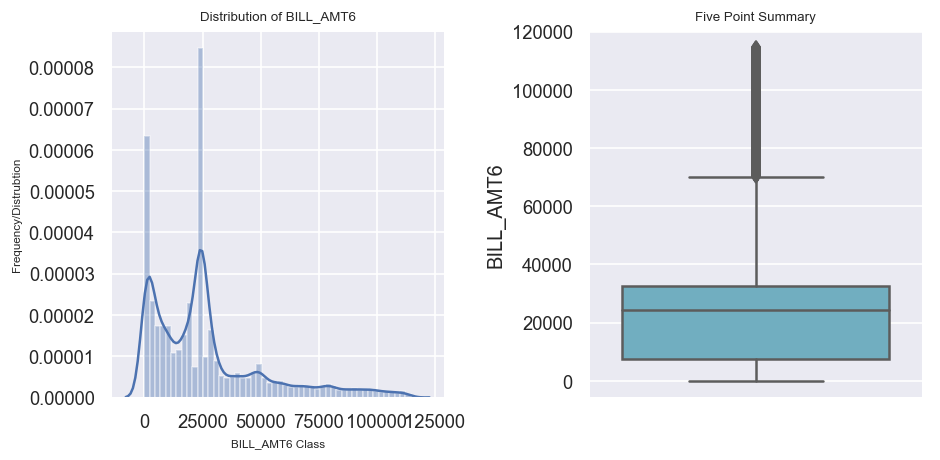

In [161]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['BILL_AMT6'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BILL_AMT6',fontdict={'fontsize':8})
axes[0].set_xlabel('BILL_AMT6 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BILL_AMT6',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Variable PAY_AMT1

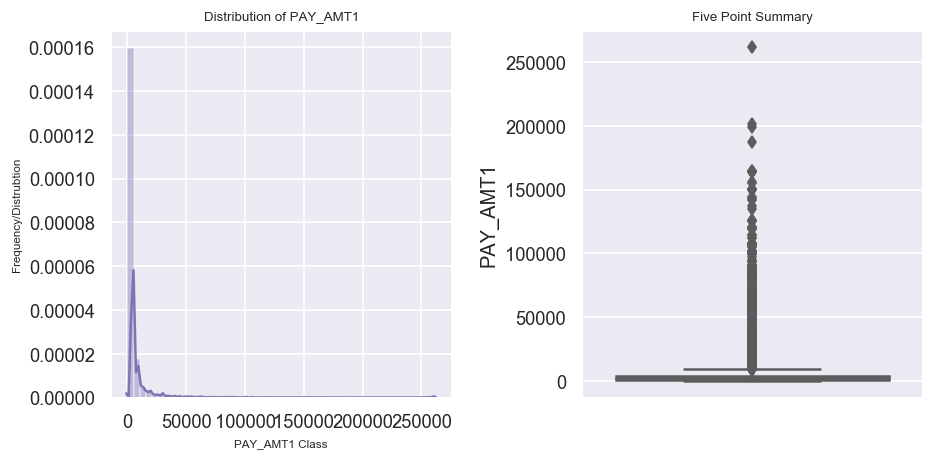

In [162]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['PAY_AMT1'],ax=axes[0],color='m')
axes[0].set_title('Distribution of PAY_AMT1',fontdict={'fontsize':8})
axes[0].set_xlabel('PAY_AMT1 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('PAY_AMT1',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [163]:
df_train.loc[df.PAY_AMT1 <= 0, "PAY_AMT1"] = df_train.PAY_AMT1.mean()
df_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,,,,
21754,80000.0,2,2,2,24,0,0,0,0,0,0,75125.0,77353.000000,78321.0,73731.000000,39643.0,39457.000000,3503.000000,5001,2092,1218,1445,878,0
252,30000.0,1,2,2,28,0,0,0,0,0,0,29242.0,29507.000000,29155.0,25255.000000,22001.0,24337.453652,5006.000000,1244,851,955,0,0,0
22942,180000.0,2,4,1,44,0,0,0,0,0,0,20916.0,41868.057679,850.0,31344.375442,6881.0,10340.000000,4331.803053,850,0,6881,10340,182,0
619,60000.0,1,1,2,25,0,0,0,0,0,0,58839.0,53235.000000,38533.0,39639.000000,39619.0,39140.000000,2018.000000,1900,2000,1500,1900,2000,0
6363,20000.0,1,3,2,32,1,2,0,0,0,0,19844.0,19238.000000,20205.0,19588.000000,20037.0,19880.000000,4331.803053,1302,685,748,697,690,0


In [164]:
df_train  = std_based('PAY_AMT1',df_train)

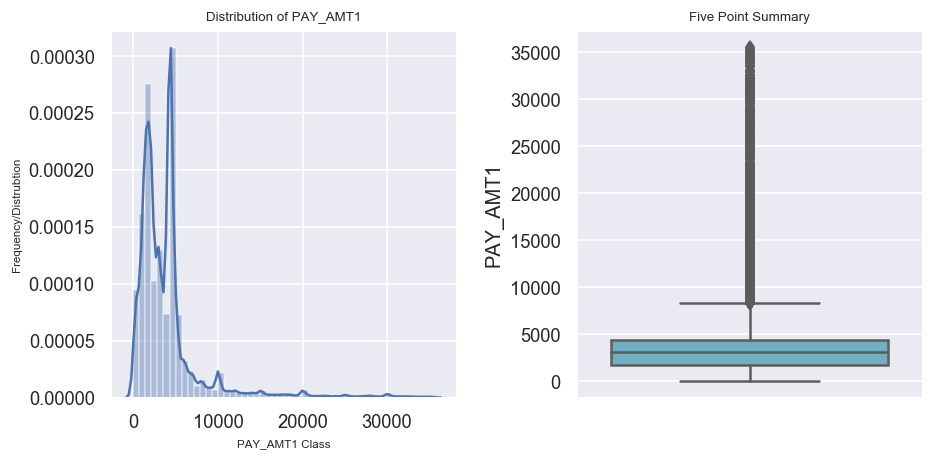

In [165]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['PAY_AMT1'],ax=axes[0],color='b')
axes[0].set_title('Distribution of PAY_AMT1',fontdict={'fontsize':8})
axes[0].set_xlabel('PAY_AMT1 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('PAY_AMT1',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Variable PAY_AMT2

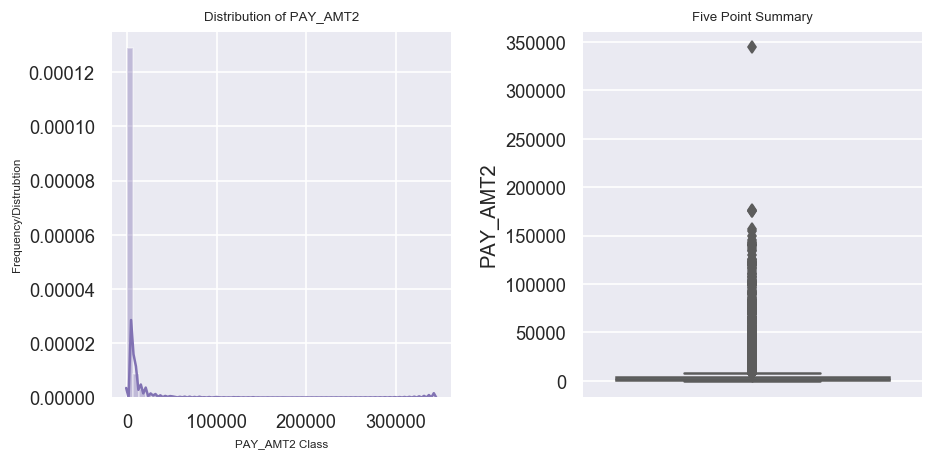

In [166]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['PAY_AMT2'],ax=axes[0],color='m')
axes[0].set_title('Distribution of PAY_AMT2',fontdict={'fontsize':8})
axes[0].set_xlabel('PAY_AMT2 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('PAY_AMT2',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [167]:
df_train.loc[df.PAY_AMT2 <= 0, "PAY_AMT2"] = df_train.PAY_AMT2.mean()
df_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,,,,
21754,80000.0,2,2,2,24,0,0,0,0,0,0,75125.0,77353.000000,78321.0,73731.000000,39643.0,39457.000000,3503.000000,5001.0,2092,1218,1445,878,0
252,30000.0,1,2,2,28,0,0,0,0,0,0,29242.0,29507.000000,29155.0,25255.000000,22001.0,24337.453652,5006.000000,1244.0,851,955,0,0,0
22942,180000.0,2,4,1,44,0,0,0,0,0,0,20916.0,41868.057679,850.0,31344.375442,6881.0,10340.000000,4331.803053,850.0,0,6881,10340,182,0
619,60000.0,1,1,2,25,0,0,0,0,0,0,58839.0,53235.000000,38533.0,39639.000000,39619.0,39140.000000,2018.000000,1900.0,2000,1500,1900,2000,0
6363,20000.0,1,3,2,32,1,2,0,0,0,0,19844.0,19238.000000,20205.0,19588.000000,20037.0,19880.000000,4331.803053,1302.0,685,748,697,690,0


In [168]:
df_train  = std_based('PAY_AMT2',df_train)

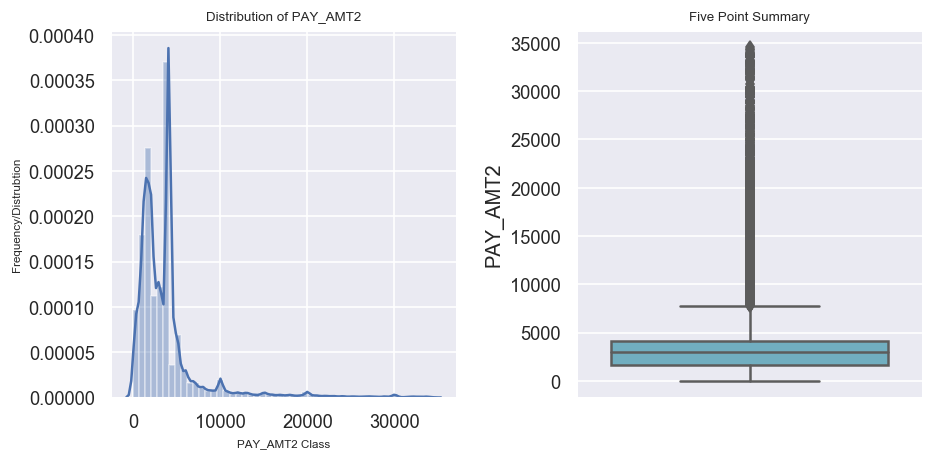

In [169]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['PAY_AMT2'],ax=axes[0],color='b')
axes[0].set_title('Distribution of PAY_AMT2',fontdict={'fontsize':8})
axes[0].set_xlabel('PAY_AMT2 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('PAY_AMT2',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Variable PAY_AMT3

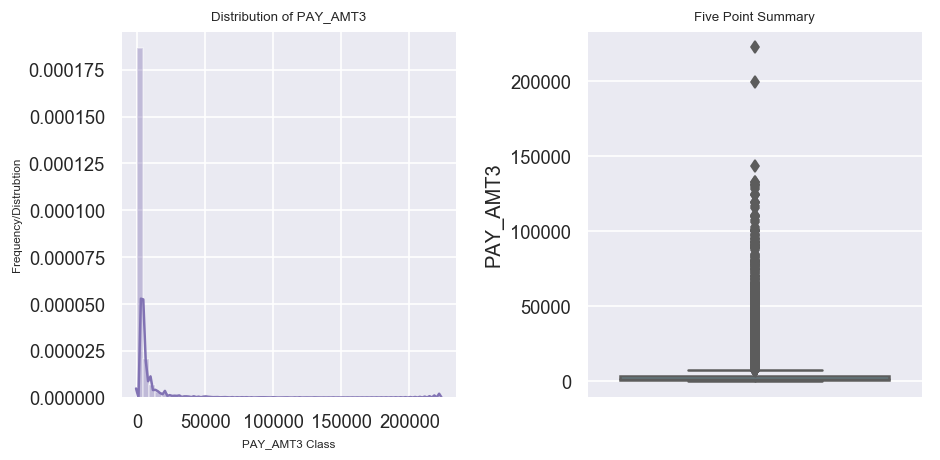

In [170]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['PAY_AMT3'],ax=axes[0],color='m')
axes[0].set_title('Distribution of PAY_AMT3',fontdict={'fontsize':8})
axes[0].set_xlabel('PAY_AMT3 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('PAY_AMT3',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [171]:
df_train.loc[df.PAY_AMT3 <= 0, "PAY_AMT3"] = df_train.PAY_AMT3.mean()
df_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,,,,
21754,80000.0,2,2,2,24,0,0,0,0,0,0,75125.0,77353.000000,78321.0,73731.000000,39643.0,39457.000000,3503.000000,5001.0,2092.000000,1218,1445,878,0
252,30000.0,1,2,2,28,0,0,0,0,0,0,29242.0,29507.000000,29155.0,25255.000000,22001.0,24337.453652,5006.000000,1244.0,851.000000,955,0,0,0
22942,180000.0,2,4,1,44,0,0,0,0,0,0,20916.0,41868.057679,850.0,31344.375442,6881.0,10340.000000,4331.803053,850.0,3517.678496,6881,10340,182,0
619,60000.0,1,1,2,25,0,0,0,0,0,0,58839.0,53235.000000,38533.0,39639.000000,39619.0,39140.000000,2018.000000,1900.0,2000.000000,1500,1900,2000,0
6363,20000.0,1,3,2,32,1,2,0,0,0,0,19844.0,19238.000000,20205.0,19588.000000,20037.0,19880.000000,4331.803053,1302.0,685.000000,748,697,690,0


In [172]:
df_train  = std_based('PAY_AMT3',df_train)

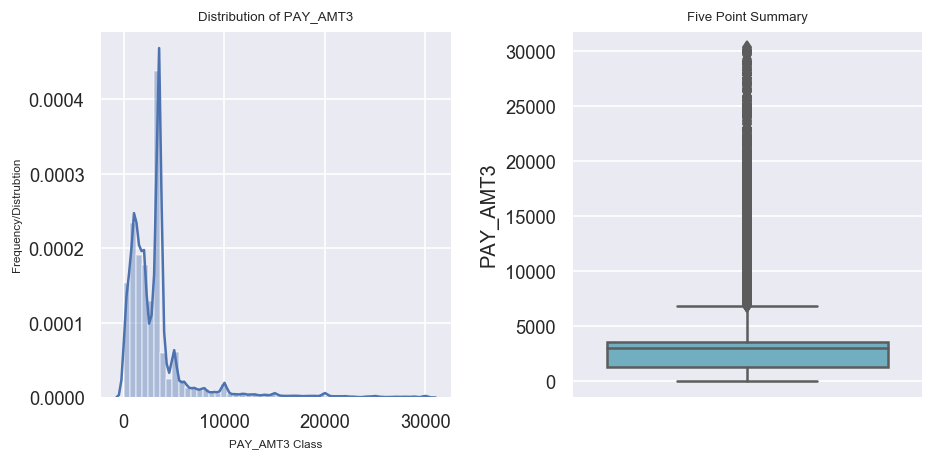

In [173]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['PAY_AMT3'],ax=axes[0],color='b')
axes[0].set_title('Distribution of PAY_AMT3',fontdict={'fontsize':8})
axes[0].set_xlabel('PAY_AMT3 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('PAY_AMT3',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Variable PAY_AMT4

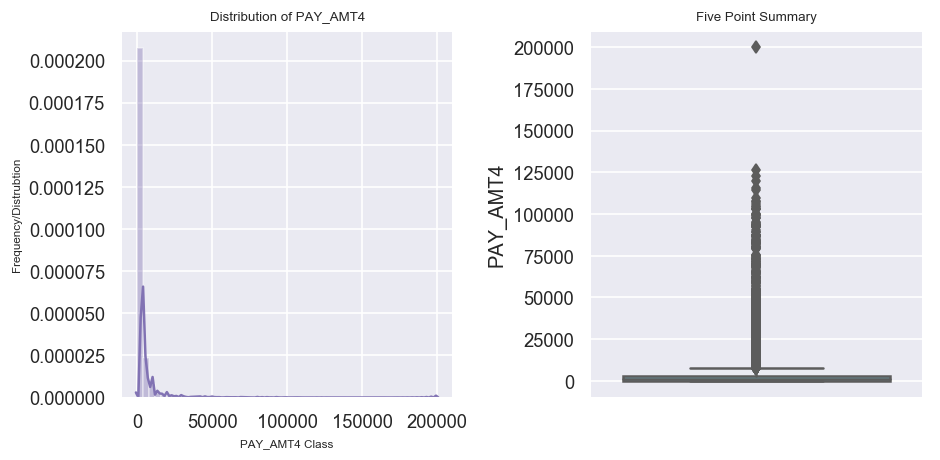

In [174]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['PAY_AMT4'],ax=axes[0],color='m')
axes[0].set_title('Distribution of PAY_AMT4',fontdict={'fontsize':8})
axes[0].set_xlabel('PAY_AMT4 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('PAY_AMT4',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [175]:
df_train.loc[df.PAY_AMT4 <= 0, "PAY_AMT4"] = df_train.PAY_AMT4.mean()
df_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,,,,
21754,80000.0,2,2,2,24,0,0,0,0,0,0,75125.0,77353.000000,78321.0,73731.000000,39643.0,39457.000000,3503.000000,5001.0,2092.000000,1218.0,1445,878,0
252,30000.0,1,2,2,28,0,0,0,0,0,0,29242.0,29507.000000,29155.0,25255.000000,22001.0,24337.453652,5006.000000,1244.0,851.000000,955.0,0,0,0
22942,180000.0,2,4,1,44,0,0,0,0,0,0,20916.0,41868.057679,850.0,31344.375442,6881.0,10340.000000,4331.803053,850.0,3517.678496,6881.0,10340,182,0
619,60000.0,1,1,2,25,0,0,0,0,0,0,58839.0,53235.000000,38533.0,39639.000000,39619.0,39140.000000,2018.000000,1900.0,2000.000000,1500.0,1900,2000,0
6363,20000.0,1,3,2,32,1,2,0,0,0,0,19844.0,19238.000000,20205.0,19588.000000,20037.0,19880.000000,4331.803053,1302.0,685.000000,748.0,697,690,0


In [176]:
df_train  = std_based('PAY_AMT4',df_train)

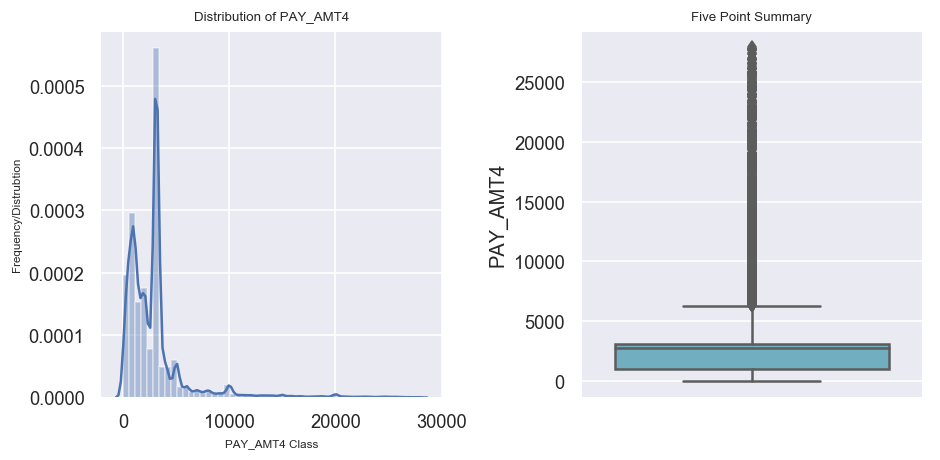

In [177]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['PAY_AMT4'],ax=axes[0],color='b')
axes[0].set_title('Distribution of PAY_AMT4',fontdict={'fontsize':8})
axes[0].set_xlabel('PAY_AMT4 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('PAY_AMT4',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Variable PAY_AMT5

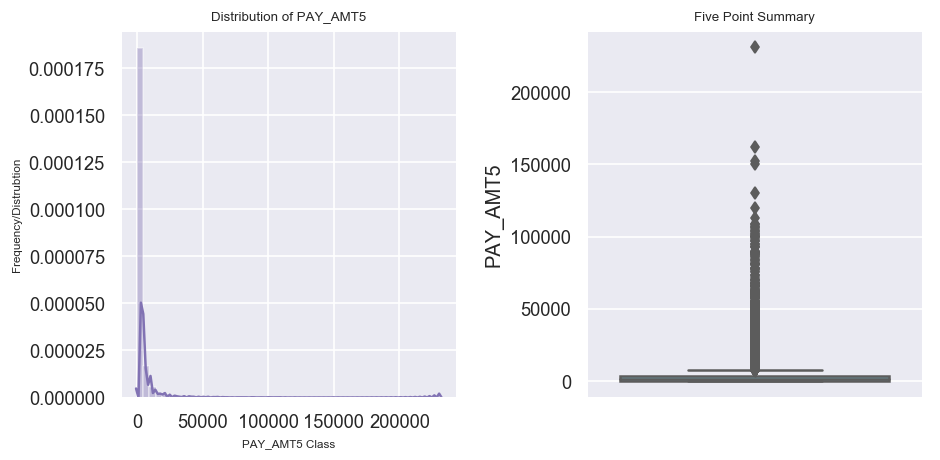

In [178]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['PAY_AMT5'],ax=axes[0],color='m')
axes[0].set_title('Distribution of PAY_AMT5',fontdict={'fontsize':8})
axes[0].set_xlabel('PAY_AMT5 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('PAY_AMT5',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [179]:
df_train.loc[df.PAY_AMT5 <= 0, "PAY_AMT5"] = df_train.PAY_AMT5.mean()
df_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,,,,
21754,80000.0,2,2,2,24,0,0,0,0,0,0,75125.0,77353.000000,78321.0,73731.000000,39643.0,39457.000000,3503.000000,5001.0,2092.000000,1218.0,1445.000000,878,0
252,30000.0,1,2,2,28,0,0,0,0,0,0,29242.0,29507.000000,29155.0,25255.000000,22001.0,24337.453652,5006.000000,1244.0,851.000000,955.0,3008.350564,0,0
22942,180000.0,2,4,1,44,0,0,0,0,0,0,20916.0,41868.057679,850.0,31344.375442,6881.0,10340.000000,4331.803053,850.0,3517.678496,6881.0,10340.000000,182,0
619,60000.0,1,1,2,25,0,0,0,0,0,0,58839.0,53235.000000,38533.0,39639.000000,39619.0,39140.000000,2018.000000,1900.0,2000.000000,1500.0,1900.000000,2000,0
6363,20000.0,1,3,2,32,1,2,0,0,0,0,19844.0,19238.000000,20205.0,19588.000000,20037.0,19880.000000,4331.803053,1302.0,685.000000,748.0,697.000000,690,0


In [180]:
df_train  = std_based('PAY_AMT5',df_train)

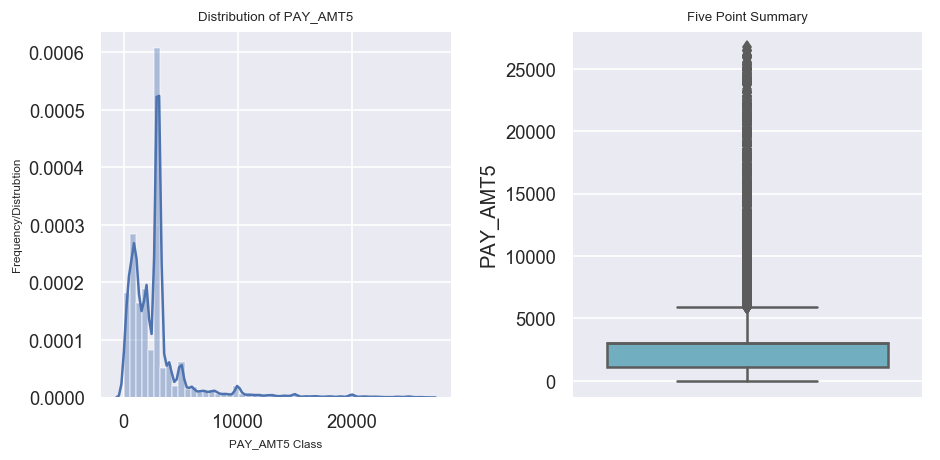

In [181]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['PAY_AMT5'],ax=axes[0],color='b')
axes[0].set_title('Distribution of PAY_AMT5',fontdict={'fontsize':8})
axes[0].set_xlabel('PAY_AMT5 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('PAY_AMT5',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Variable PAY_AMT6

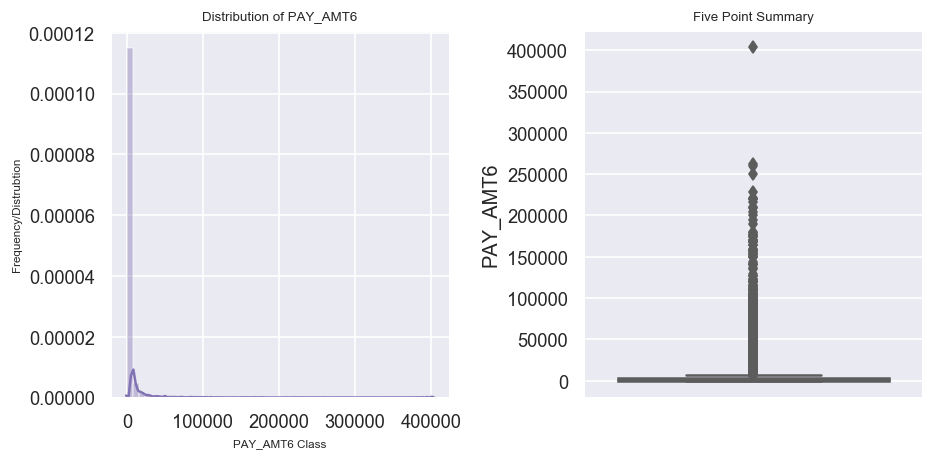

In [182]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['PAY_AMT6'],ax=axes[0],color='m')
axes[0].set_title('Distribution of PAY_AMT6',fontdict={'fontsize':8})
axes[0].set_xlabel('PAY_AMT6 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('PAY_AMT6',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [183]:
df_train.loc[df.PAY_AMT6 <= 0, "PAY_AMT6"] = df_train.PAY_AMT6.mean()
df_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,,,,
21754,80000.0,2,2,2,24,0,0,0,0,0,0,75125.0,77353.000000,78321.0,73731.000000,39643.0,39457.000000,3503.000000,5001.0,2092.000000,1218.0,1445.000000,878.000000,0
252,30000.0,1,2,2,28,0,0,0,0,0,0,29242.0,29507.000000,29155.0,25255.000000,22001.0,24337.453652,5006.000000,1244.0,851.000000,955.0,3008.350564,3486.571384,0
22942,180000.0,2,4,1,44,0,0,0,0,0,0,20916.0,41868.057679,850.0,31344.375442,6881.0,10340.000000,4331.803053,850.0,3517.678496,6881.0,10340.000000,182.000000,0
619,60000.0,1,1,2,25,0,0,0,0,0,0,58839.0,53235.000000,38533.0,39639.000000,39619.0,39140.000000,2018.000000,1900.0,2000.000000,1500.0,1900.000000,2000.000000,0
6363,20000.0,1,3,2,32,1,2,0,0,0,0,19844.0,19238.000000,20205.0,19588.000000,20037.0,19880.000000,4331.803053,1302.0,685.000000,748.0,697.000000,690.000000,0


In [184]:
df_train  = std_based('PAY_AMT6',df_train)

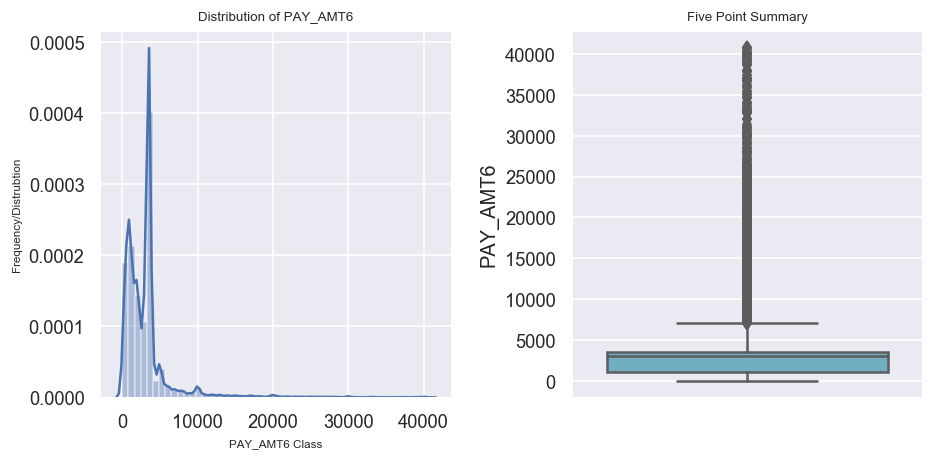

In [185]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df_train['PAY_AMT6'],ax=axes[0],color='b')
axes[0].set_title('Distribution of PAY_AMT6',fontdict={'fontsize':8})
axes[0].set_xlabel('PAY_AMT6 Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('PAY_AMT6',data=df_train,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [ ]:
df_train.shape

(240, 4)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 213 to 102
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      240 non-null    int64
 1   Year_of_operation        240 non-null    int64
 2   Axillary_nodes_detected  240 non-null    int64
 3   Survival_status          240 non-null    int64
dtypes: int64(4)
memory usage: 9.4 KB


Distribución de Salida

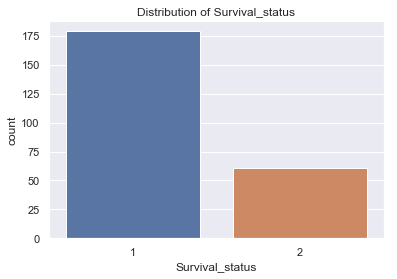

In [ ]:
sns.countplot(df_train['Survival_status']).set_title('Distribution of Survival_status')
plt.show()

A partir de los dataframes de entrenamiento y prueba se generan los dataframes con variables dependientes e independientes

In [ ]:
X_train = df_train.drop(["Survival_status"], axis = 1).copy()
y_train = df_train["Survival_status"].copy()
X_test = df_test.drop(["Survival_status"], axis = 1).copy()
y_test = df_test["Survival_status"].copy()

Normalización de dataframes de variables independientes

In [ ]:
means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)
X_train_sc = (X_train - means)/stds
X_test_sc = (X_test - means)/stds

In [ ]:
X_train_sc.head()

,Age,Year_of_operation,Axillary_nodes_detected
213,0.511437,-1.518605,-0.168461
244,0.882549,-1.518605,-0.549883
75,-0.787451,0.037608,2.882912
179,0.140326,-0.273634,-0.549883
59,-0.973007,-0.273634,3.073623


Modelo utilizando Regresión Logisitica

In [47]:
lr = LogisticRegression(class_weight="balanced",
                        penalty='l2',
                        C=0.001,
                        solver='lbfgs',
                        max_iter=1000,
                        tol=0.0001)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

LR_score_accuracy = cross_val_score(lr, X_train_sc, y_train, scoring="accuracy", cv=cv)
LR_score_recall = cross_val_score(lr, X_train_sc, y_train, scoring="recall", cv=cv)
LR_score_precision = cross_val_score(lr, X_train_sc, y_train, scoring="precision", cv=cv)
LR_score_f1 = cross_val_score(lr, X_train_sc, y_train, scoring="f1", cv=cv)

In [48]:
print('Métrica accuracy: Valor promedio CV: %.2f%%' % (np.mean(LR_score_accuracy)*100))
print('Métrica recall: Valor promedio CV: %.2f%%' % (np.mean(LR_score_recall)*100))
print('Métrica precision: Valor promedio CV: %.2f%%' % (np.mean(LR_score_precision)*100))
print('Métrica f1: Valor promedio CV: %.2f%%' % (np.mean(LR_score_f1)*100))

Métrica accuracy: Valor promedio CV: 73.96%
Métrica recall: Valor promedio CV: 82.14%
Métrica precision: Valor promedio CV: 82.70%
Métrica f1: Valor promedio CV: 82.50%


In [50]:
lr.fit(X_train_sc,y_train)

LogisticRegression(C=0.001, class_weight='balanced', max_iter=1000)

In [51]:
pred = lr.predict(X_test_sc)

cm = confusion_matrix(y_test, pred)
print(cm)

[[35  9]
 [12  6]]


In [52]:
accuracy_score(y_test, pred)

0.6612903225806451

In [53]:
recall_score(y_test, pred)

0.7954545454545454

In [54]:
precision_score(y_test,pred)

0.7446808510638298

In [55]:
f1_score(y_test, pred)

0.7692307692307692

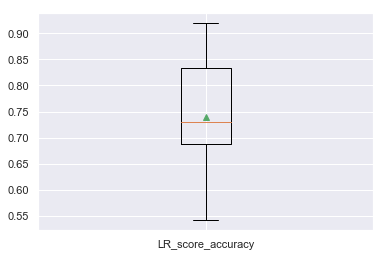

In [56]:
plt.boxplot(LR_score_accuracy, labels=['LR_score_accuracy'], showmeans=True)
plt.show()

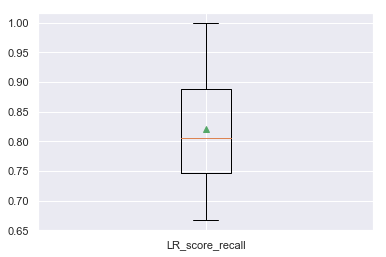

In [57]:
plt.boxplot(LR_score_recall, labels=['LR_score_recall'], showmeans=True)
plt.show()

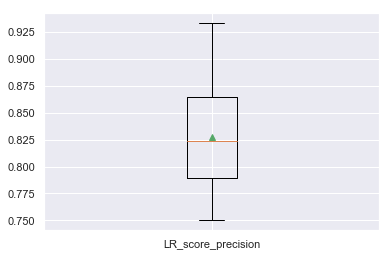

In [58]:
plt.boxplot(LR_score_precision, labels=['LR_score_precision'], showmeans=True)
plt.show()

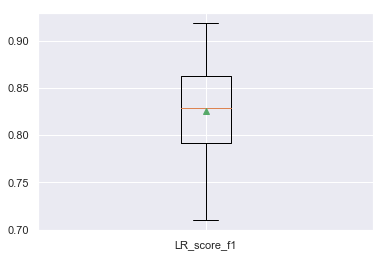

In [59]:
plt.boxplot(LR_score_f1, labels=['LR_score_f1'], showmeans=True)
plt.show()

Modelo utilizando KNN

In [31]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [32]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

KNN_score_accuracy = cross_val_score(knn, X_train_sc, y_train, scoring="accuracy", cv=cv)
KNN_score_recall = cross_val_score(knn, X_train_sc, y_train, scoring="recall", cv=cv)
KNN_score_precision = cross_val_score(knn, X_train_sc, y_train, scoring="precision", cv=cv)
KNN_score_f1 = cross_val_score(knn, X_train_sc, y_train, scoring="f1", cv=cv)

In [33]:
print('Métrica accuracy: Valor promedio CV: %.2f%%' % (np.mean(KNN_score_accuracy)*100))
print('Métrica recall: Valor promedio CV: %.2f%%' % (np.mean(KNN_score_recall)*100))
print('Métrica precision: Valor promedio CV: %.2f%%' % (np.mean(KNN_score_precision)*100))
print('Métrica f1: Valor promedio CV: %.2f%%' % (np.mean(KNN_score_f1)*100))

Métrica accuracy: Valor promedio CV: 69.67%
Métrica recall: Valor promedio CV: 84.80%
Métrica precision: Valor promedio CV: 77.72%
Métrica f1: Valor promedio CV: 81.11%


In [34]:
knn.fit(X_train_sc,y_train)

knn.score(X_test_sc, y_test)

0.6774193548387096

In [35]:
pred = knn.predict(X_test_sc)

cm = confusion_matrix(y_test, pred)
print(cm)

[[37  7]
 [13  5]]


In [36]:
accuracy_score(y_test, pred)

0.6774193548387096

In [37]:
recall_score(y_test, pred)

0.8409090909090909

In [38]:
precision_score(y_test,pred)

0.74

In [39]:
f1_score(y_test, pred)

0.7872340425531915

In [ ]:
f1 = fbeta_score(y_test, pred, beta=1.0)   # le da igual importancia a minimizar FN y FP
f2 = fbeta_score(y_test, pred, beta=2.0)   # le da mayor importancia a minimizar los FN
f05 = fbeta_score(y_test, pred, beta=0.5)  # le da mayor importancia a minimizar los FP

print('Result: f1=%.3f, f2=%.3f, f05=%.3f' % (f1, f2, f05))

Result: f1=0.787, f2=0.819, f05=0.758


Modelo utilizando Support Vector Classifier

In [19]:
C_range = np.logspace(start=-3, stop=2, num=4, base=10.0)
n_degree = [n for n in range(2, 8)]

param_grid = {'C': C_range,
              'kernel':['poly','rbf','linear','sigmoid'],
              'degree': n_degree,
              'gamma':[0.1,0.01,0.2,0.4]}

svc = SVC(class_weight="balanced")
svc = RandomizedSearchCV(svc, param_distributions=param_grid,
                    cv=3, n_iter=10)

svc_model = svc.fit(X_train_sc, y_train)

print("Los mejores parametros son %s con un score de %0.2f"
      % (svc_model.best_params_, svc_model.best_score_))

Los mejores parametros son {'kernel': 'sigmoid', 'gamma': 0.01, 'degree': 5, 'C': 2.1544346900318843} con un score de 0.75


In [20]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

SVC_score_accuracy = cross_val_score(svc_model, X_train_sc, y_train, scoring="accuracy", cv=cv)
SVC_score_recall = cross_val_score(svc_model, X_train_sc, y_train, scoring="recall", cv=cv)
SVC_score_precision = cross_val_score(svc_model, X_train_sc, y_train, scoring="precision", cv=cv)
SVC_score_f1 = cross_val_score(svc_model, X_train_sc, y_train, scoring="f1", cv=cv)

In [21]:
print('Métrica accuracy: Valor promedio CV: %.2f%%' % (np.mean(SVC_score_accuracy)*100))
print('Métrica recall: Valor promedio CV: %.2f%%' % (np.mean(SVC_score_recall)*100))
print('Métrica precision: Valor promedio CV: %.2f%%' % (np.mean(SVC_score_precision)*100))
print('Métrica f1: Valor promedio CV: %.2f%%' % (np.mean(SVC_score_f1)*100))

Métrica accuracy: Valor promedio CV: 74.78%
Métrica recall: Valor promedio CV: 88.56%
Métrica precision: Valor promedio CV: 79.35%
Métrica f1: Valor promedio CV: 83.37%


In [22]:
pred = svc_model.predict(X_test_sc)

cm = confusion_matrix(y_test, pred)
print(cm)

[[39  5]
 [13  5]]


In [30]:
accuracy_score(y_test, pred)

0.7096774193548387

In [24]:
recall_score(y_test, pred)

0.8863636363636364

In [25]:
precision_score(y_test,pred)

0.75

In [26]:
f1_score(y_test, pred)

0.8125000000000001

In [204]:
f1 = fbeta_score(y_test, pred, beta=1.0)   # le da igual importancia a minimizar FN y FP
f2 = fbeta_score(y_test, pred, beta=2.0)   # le da mayor importancia a minimizar los FN
f05 = fbeta_score(y_test, pred, beta=0.5)  # le da mayor importancia a minimizar los FP

print('Result: f1=%.3f, f2=%.3f, f05=%.3f' % (f1, f2, f05))

Result: f1=0.787, f2=0.819, f05=0.758


Modelo utilizando ANN

In [205]:
parameter_space = {
    'hidden_layer_sizes': [(10,),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
mlp_gs = MLPClassifier(max_iter=1000)

mlp_gs = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf = mlp_gs.fit(X_train_sc, y_train)

print("Los mejores parametros son %s con un score de %0.2f"
      % (clf.best_params_, clf.best_score_))

Los mejores parametros son {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive', 'solver': 'adam'} con un score de 0.77


In [206]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

ANN_score_accuracy = cross_val_score(mlp_gs, X_train_sc, y_train, scoring="accuracy", cv=cv)
ANN_score_recall = cross_val_score(mlp_gs, X_train_sc, y_train, scoring="recall", cv=cv)
ANN_score_precision = cross_val_score(mlp_gs, X_train_sc, y_train, scoring="precision", cv=cv)
ANN_score_f1 = cross_val_score(mlp_gs, X_train_sc, y_train, scoring="f1", cv=cv)

In [231]:
print('Métrica accuracy: Valor promedio CV: %.2f%%' % (np.mean(ANN_score_accuracy)*100))
print('Métrica recall: Valor promedio CV: %.2f%%' % (np.mean(ANN_score_recall)*100))
print('Métrica precision: Valor promedio CV: %.2f%%' % (np.mean(ANN_score_precision)*100))
print('Métrica f1: Valor promedio CV: %.2f%%' % (np.mean(ANN_score_f1)*100))

Métrica accuracy: Valor promedio CV: 76.67%
Métrica recall: Valor promedio CV: 93.91%
Métrica precision: Valor promedio CV: 78.06%
Métrica f1: Valor promedio CV: 85.53%


In [232]:
pred = mlp_gs.predict(X_test_sc)

cm = confusion_matrix(y_test, pred)
print(cm)

[[40  4]
 [15  3]]


In [233]:
accuracy_score(y_test, pred)

0.6935483870967742

In [234]:
recall_score(y_test, pred)

0.9090909090909091

In [235]:
precision_score(y_test,pred)

0.7272727272727273

In [236]:
f1_score(y_test, pred)

0.8080808080808082

In [210]:
f1 = fbeta_score(y_test, pred, beta=1.0)   # le da igual importancia a minimizar FN y FP
f2 = fbeta_score(y_test, pred, beta=2.0)   # le da mayor importancia a minimizar los FN
f05 = fbeta_score(y_test, pred, beta=0.5)  # le da mayor importancia a minimizar los FP

print('Result: f1=%.3f, f2=%.3f, f05=%.3f' % (f1, f2, f05))

Result: f1=0.804, f2=0.852, f05=0.762


--------------------Analisis con el conjunto de prueba omitiendo el balanceo de clases-----------------------------------

In [60]:
C_range = np.logspace(start=-3, stop=2, num=4, base=10.0)
n_degree = [n for n in range(2, 8)]

param_grid = {'C': C_range,
              'kernel':['poly','rbf','linear','sigmoid'],
              'degree': n_degree,
              'gamma':[0.1,0.01,0.2,0.4]}

svc = SVC()
svc = RandomizedSearchCV(svc, param_distributions=param_grid,
                    cv=3, n_iter=10)

svc_model = svc.fit(X_train_sc, y_train)

print("Los mejores parametros son %s con un score de %0.2f"
      % (svc_model.best_params_, svc_model.best_score_))

Los mejores parametros son {'kernel': 'rbf', 'gamma': 0.1, 'degree': 7, 'C': 100.0} con un score de 0.76


In [61]:

pred = svc_model.predict(X_test_sc)
cm = confusion_matrix(y_test, pred)
print(cm)

t= cm.sum()
print(cm[0,0]/t, cm[0,1]/t)
print(cm[1,0]/t, cm[1,1]/t)

[[37  7]
 [14  4]]
0.5967741935483871 0.11290322580645161
0.22580645161290322 0.06451612903225806


In [62]:
accuracy_score(y_test, pred)

0.6612903225806451

In [63]:
recall_score(y_test, pred)

0.8409090909090909

In [64]:
precision_score(y_test,pred)

0.7254901960784313

In [65]:
f1_score(y_test, pred)

0.7789473684210527

In [67]:
f1 = fbeta_score(y_test, pred, beta=1.0)   # le da igual importancia a minimizar FN y FP
f2 = fbeta_score(y_test, pred, beta=2.0)   # le da mayor importancia a minimizar los FN
f05 = fbeta_score(y_test, pred, beta=0.5)  # le da mayor importancia a minimizar los FP

print('Result: f1=%.3f, f2=%.3f, f05=%.3f' % (f1, f2, f05))

Result: f1=0.779, f2=0.815, f05=0.746


---------------------------------------------------------------------------------------------------